# Atividade Continuada 1

### 1.b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

notas = [3.7, 8.0, 7.2, 2.5, 3.2, 3.8, 9.8, 8.1, 6.6, 8.8, 7.6, 1.8, 1.1, 2.0, 4.4]
print(f"Média: {np.mean(notas):.3}")

Média: 5.24


In [ ]:
print(f"Mediana: {np.median(notas):.3}")

Mediana: 4.4


In [ ]:
print(f"Variancia Populacional: {np.var(notas):.3}")
print(f"Variancia Amostral: {np.var(notas, ddof=1):.3}")

Variancia Populacional: 7.79
Variancia Populacional: 8.34


In [ ]:
print(f"Desvio Padrão Populacional: {np.std(notas):.3}")
print(f"Desvio Padrão Amostral: {np.std(notas, ddof=1):.3}")

Desvio Padrão Populacional: 2.79
Desvio Padrão Populacional: 2.89


In [ ]:
print(f"Coeficiente de Variação Populacional: {((np.std(notas)/np.mean(notas)) * 100):.4}")
print(f"Coeficiente de Variação Populacional: {((np.std(notas,ddof=1)/np.mean(notas)) * 100):.4}")

Coeficiente de Variação Populacional: 53.26
Coeficiente de Variação Populacional: 55.13


In [ ]:
print(f"Quartil 1: {np.percentile(notas, 25, interpolation='lower')}")
print(f"Quartil 2: {np.percentile(notas, 50)}")
print(f"Quartil 3: {np.percentile(notas, 75, interpolation='higher')}")


Quartil 1: 2.5
Quartil 2: 4.4
Quartil 3: 8.0


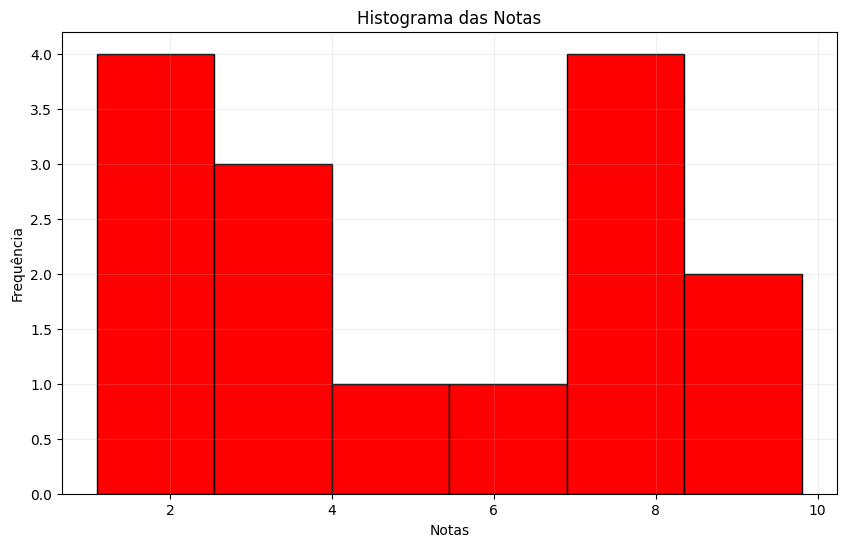

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(notas, bins=6, edgecolor='black', color='red')
plt.title('Histograma das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.2)
plt.show()

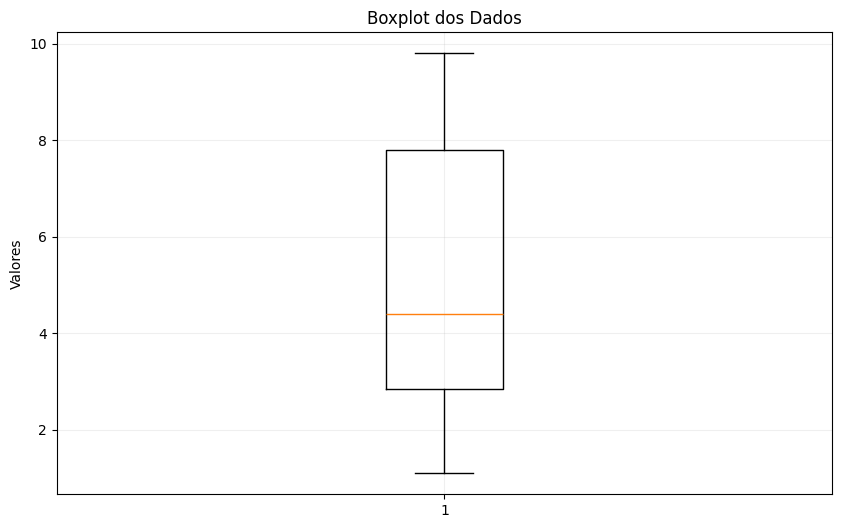

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(notas)
plt.title('Boxplot dos Dados')
plt.ylabel('Valores')
plt.grid(True, alpha=0.2)
plt.show()


### 1.c

In [127]:
def func_media(dados):
  media = 0
  for i in dados:
    media += i
  return media/len(dados)

func_media(notas)

5.24

In [ ]:
def func_mediana(dados):
  dados.sort()
  if len(dados) % 2 == 0:
    return (dados[(len(dados))//2 - 1] + dados[len(dados) // 2])/2
  else:
    return dados[len(dados)//2]

func_mediana(notas)

4.4

In [ ]:
def func_variancia(dados, definition):
  if definition == 'p':
    n = len(dados)
  elif definition == 'a':
    n = len(dados) - 1
  media = func_media(dados)
  variancia = 0
  for i in dados:
    variancia += (i - media)**2
  return variancia/n

print(func_variancia(notas, 'p'))
print(func_variancia(notas, 'a'))

7.787733333333334
8.344


In [ ]:
def desvio_padrao(dados, definition):
  variancia = func_variancia(dados, definition)
  desvio = variancia**0.5
  return desvio

print(desvio_padrao(notas, 'p'))
print(desvio_padrao(notas, 'a'))

2.7906510590421965
2.8885982759809297


In [ ]:
def coeficiente_variacao(dados, definition):
  desvio = desvio_padrao(dados, definition)
  media = func_media(dados)
  return (desvio/media)*100

print(coeficiente_variacao(notas, 'p'))
print(coeficiente_variacao(notas, 'a'))

53.25669960004191
55.12592129734598


In [ ]:
def func_quartis(dados):
  dados.sort()
  if len(dados) % 2 == 0:
      mediana = (dados[(len(dados))//2 - 1] + dados[len(dados) // 2])/2
  else:
      mediana = dados[len(dados)//2]
  if len(dados) % 2 == 0:
      metade_inferior = dados[:len(dados)//2]
  else:
      metade_inferior = dados[:len(dados)//2]

  n1 = len(metade_inferior)
  if n1 % 2 == 0:
      q1 = (metade_inferior[n1//2 - 1] + metade_inferior[n1//2]) / 2
  else:
      q1 = metade_inferior[n1//2]

  if len(dados) % 2 == 0:
      metade_superior = dados[len(dados)//2:]
  else:
      metade_superior = dados[len(dados)//2 + 1:]

  n3 = len(metade_superior)
  if n3 % 2 == 0:
      q3 = (metade_superior[n3//2 - 1] + metade_superior[n3//2]) / 2
  else:
      q3 = metade_superior[n3//2]

  print(f"Q1 : {q1}")
  print(f"Q2 : {mediana}")
  print(f"Q3 : {q3}")
  return mediana, q1, q3

func_quartis(notas)

Q1 : 2.5
Q2 : 4.4
Q3 : 8.0


(4.4, 2.5, 8.0)

### 2.a

In [95]:
import pandas as pd
import zipfile
import requests
from io import BytesIO


In [109]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
r = requests.get(url)
z = zipfile.ZipFile(BytesIO(r.content))

df = pd.read_csv(z.open('student-mat.csv'), sep=';')
dados_notas = df['G1'].tolist() #tabem temos G2 e G3 que sao respectivamento nota parcial 2 e media final
dados_notas = [x/2 for x in dados_notas] #para deixar os dados de 0 a 10
len(dados_notas)

395

In [113]:
print(f"Media: {np.mean(dados_notas):.3}")

Media: 5.45


In [114]:
print(f"Mediana: {np.median(dados_notas):.3}")

Mediana: 5.5


In [115]:
print(f"Variancia Populacional: {np.var(dados_notas):.3}")
print(f"Variancia Amostral: {np.var(dados_notas, ddof=1):.3}")

Variancia Populacional: 2.75
Variancia Amostral: 2.75


In [116]:
print(f"Desvio Padrão Populacional: {np.std(dados_notas):.3}")
print(f"Desvio Padrão Amostral: {np.std(dados_notas, ddof=1):.3}")

Desvio Padrão Populacional: 1.66
Desvio Padrão Amostral: 1.66


In [118]:
print(f"Coeficiente de Variação Populacional: {((np.std(dados_notas) /np.mean(dados_notas)) * 100):.3}")
print(f"Coeficiente de Variação Amostral: {((np.std(dados_notas, ddof=1) /np.mean(dados_notas)) * 100):.3}")

Coeficiente de Variação Populacional: 30.4
Coeficiente de Variação Amostral: 30.4


In [119]:
print(f"Quartil 1: {np.percentile(dados_notas, 25, interpolation='lower')}")
print(f"Quartil 2: {np.percentile(dados_notas, 50)}")
print(f"Quartil 3: {np.percentile(dados_notas, 75, interpolation='higher')}")

Quartil 1: 4.0
Quartil 2: 5.5
Quartil 3: 6.5


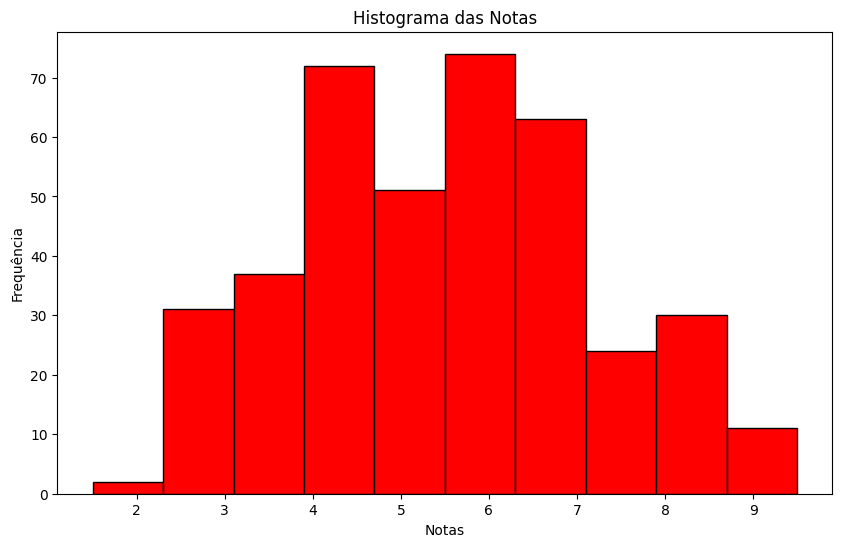

In [123]:
plt.figure(figsize=(10, 6))
plt.hist(dados_notas, edgecolor='black', color='red')
plt.title('Histograma das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

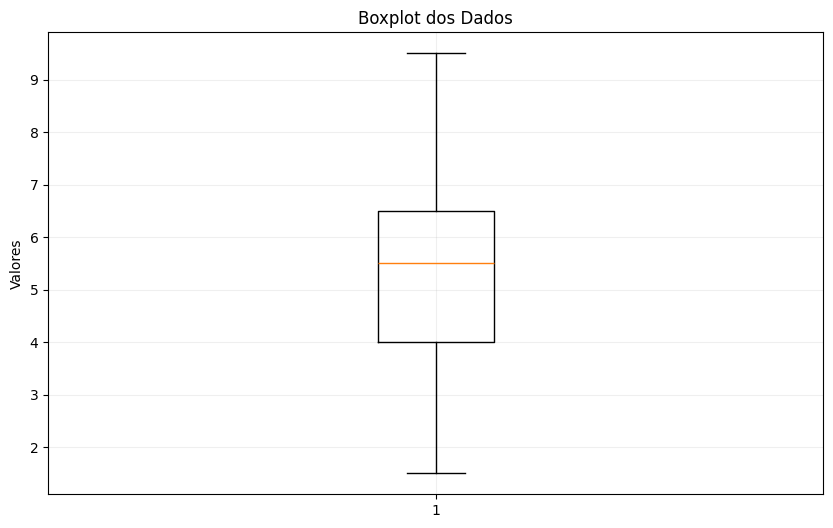

In [125]:
plt.figure(figsize=(10,6))
plt.boxplot(dados_notas)
plt.title('Boxplot dos Dados')
plt.ylabel('Valores')
plt.grid(True, alpha=0.2)
plt.show()

### 2.b


In [129]:
print(f"Media: {func_media(dados_notas):.3}")

Media: 5.45


In [130]:
print(f"Mediana: {func_mediana(dados_notas):.3}")

Mediana: 5.5


In [131]:
print(f"Variancia Populacional: {func_variancia(dados_notas, 'p'):.3}")
print(f"Variancia Amostral: {func_variancia(dados_notas, 'a'):.3}")

Variancia Populacional: 2.75
Variancia Amostral: 2.75


In [132]:
print(f"Desvio Padrão Populacional: {desvio_padrao(dados_notas, 'p'):.3}")
print(f"Desvio Padrão Amostral: {desvio_padrao(dados_notas, 'a'):.3}")

Desvio Padrão Populacional: 1.66
Desvio Padrão Amostral: 1.66


In [133]:
print(f"Coeficiente de Variação Populacional: {coeficiente_variacao(dados_notas, 'p'):.3}")
print(f"Coeficiente de Variação Amostral: {coeficiente_variacao(dados_notas, 'a'):.3}")

Coeficiente de Variação Populacional: 30.4
Coeficiente de Variação Amostral: 30.4


In [135]:
print(f"Quartis: {func_quartis(dados_notas)}")

Q1 : 4.0
Q2 : 5.5
Q3 : 6.5
Quartis: (5.5, 4.0, 6.5)
